<a href="https://colab.research.google.com/github/salsabilhera/salsabilhera/blob/main/Implementasi_Arsitektur_Convolutional_Neural_Network_(CNN)_pada_Klasifikasi_CAPTCHA_Menggunakan_Dataset_Publik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Implementasi Arsitektur Convolutional Neural  Network (CNN) pada Klasifikasi CAPTCHA Menggunakan Dataset Publik**

Salsabila Herapuspitaningrum Sastro

2106722726

# Image procesing

In [ ]:
import cv2
import pandas
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fournierp/captcha-version-2-images")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/fournierp/captcha-version-2-images/versions/2


In [ ]:
path1 = '/root/.cache/kagglehub/datasets/fournierp/captcha-version-2-images/versions/2/samples/23n88.png'
path2 = '/root/.cache/kagglehub/datasets/fournierp/captcha-version-2-images/versions/2/samples/23mdg.png'

In [ ]:
def plot_ (img1, img2) :
    plt.figure(figsize = (20,5))

    plt.subplot(1,2,1)
    plt.imshow(img1, 'gray')

    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(img2, 'gray')

    plt.axis('off')

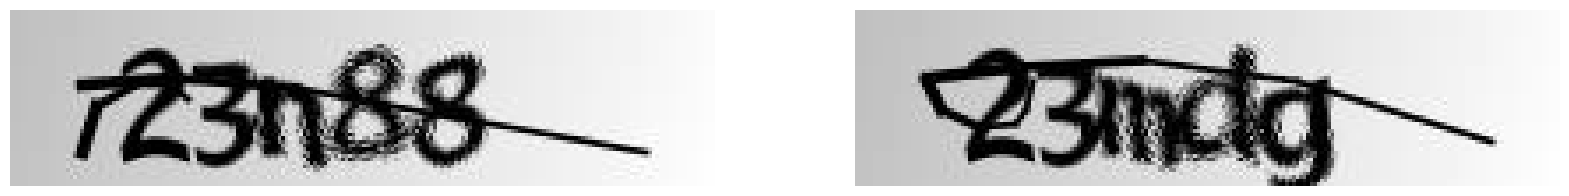

In [ ]:
img1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)
plot_(img1, img2)

### Adaptive Thresholding
Algorithms determine the threshold for a pixel based on its surrounding regions. So we get different thresholds for different regions of the same image which gives better result for images with varying illumination.

In [ ]:
thresh_img1 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
thresh_img2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)

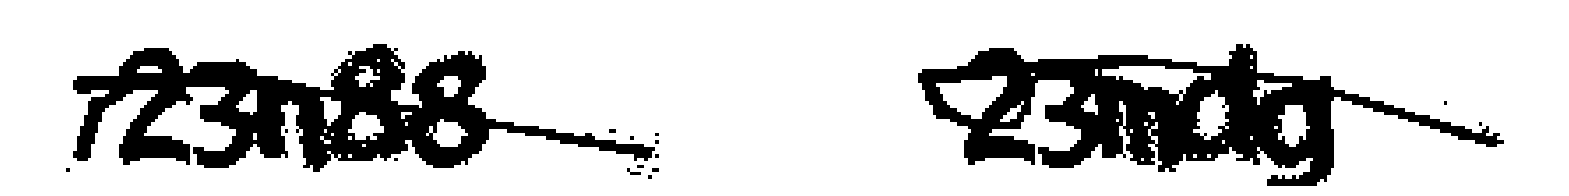

In [ ]:
plot_(thresh_img1, thresh_img2)

### Closing
Dilation followed by Erosion.

In [ ]:
close_img1 = cv2.morphologyEx(thresh_img1, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))
close_img2 = cv2.morphologyEx(thresh_img2, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))

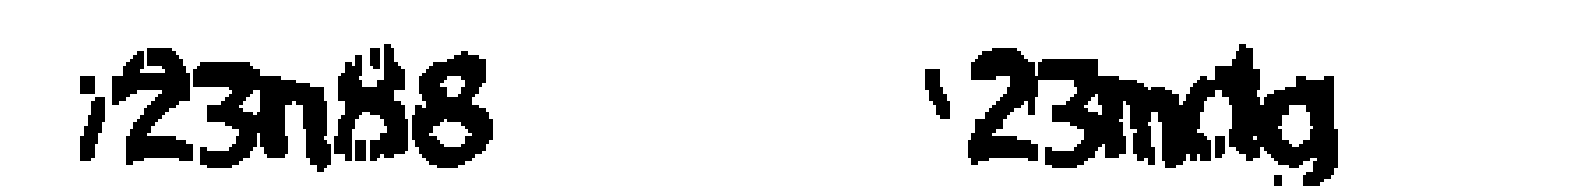

In [ ]:
plot_(close_img1, close_img2)

### Dilation
Involves a kernel being scanned over the entire image. The maximal pixel value is calculated in the kernel region and the anchor point of the kernel is updated to that value. This causes the white region to expand in the image.

In [ ]:
dilate_img1 = cv2.dilate(close_img1, np.ones((2,2), np.uint8), iterations = 1)
dilate_img2 = cv2.dilate(close_img2, np.ones((2,2), np.uint8), iterations = 1)

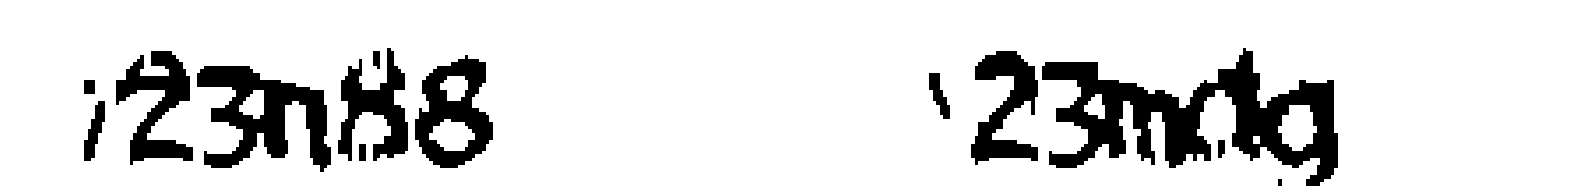

In [ ]:
plot_(dilate_img1, dilate_img2)

### Smoothing Images (Blurring)
Involves convolving a low-pass filter with an image, to remove high frequency components ie. noises and edges from the image.

In [ ]:
gauss_img1 = cv2.GaussianBlur(dilate_img1, (1,1), 0)
gauss_img2 = cv2.GaussianBlur(dilate_img2, (1,1), 0)

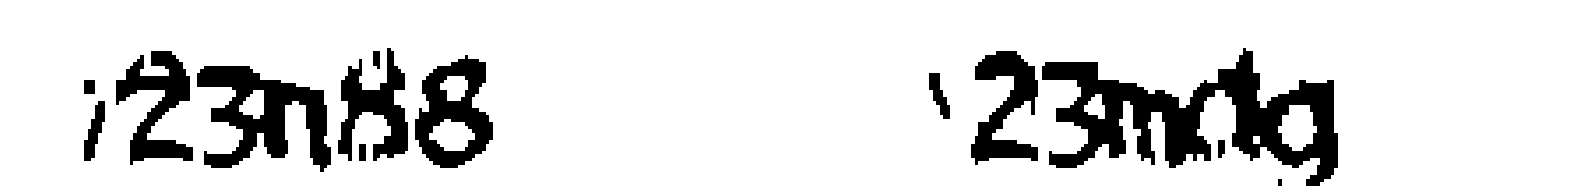

In [ ]:
plot_(gauss_img1, gauss_img2)

### PartitioningBatchNormalization

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
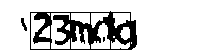

In [ ]:
cv2.rectangle(gauss_img1, (30,12), (50,49), 0, 1)
cv2.rectangle(gauss_img1, (50,12), (70,49), 0, 1)
cv2.rectangle(gauss_img1, (70,12), (90,49), 0, 1)
cv2.rectangle(gauss_img1, (90,12), (110,49),0, 1)
cv2.rectangle(gauss_img1, (110,12),(130,49),0, 1)

cv2.rectangle(gauss_img2, (30,12), (50,49), 0, 1)
cv2.rectangle(gauss_img2, (50,12), (70,49), 0, 1)
cv2.rectangle(gauss_img2, (70,12), (90,49), 0, 1)
cv2.rectangle(gauss_img2, (90,12), (110,49),0, 1)
cv2.rectangle(gauss_img2, (110,12),(130,49),0, 1)

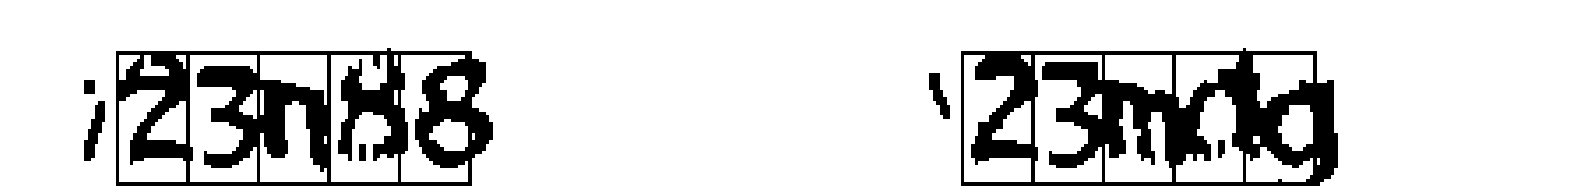

In [ ]:
plot_(gauss_img1, gauss_img2)

# Converting images to appropriate samples

In [ ]:
path = '/root/.cache/kagglehub/datasets/fournierp/captcha-version-2-images/versions/2/samples/'

In [ ]:
def t_img (img) :
    return cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)

def c_img (img) :
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((5,2), np.uint8))

def d_img (img) :
    return cv2.dilate(img, np.ones((2,2), np.uint8), iterations = 1)

def b_img (img) :
    return cv2.GaussianBlur(img, (1,1), 0)

In [ ]:
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator

In [ ]:
X = []
y = []

for image in os.listdir(path) :

    if image[6:] != 'png' :
        continue

    img = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)

    img = t_img(img)
    img = c_img(img)
    img = d_img(img)
    img = b_img(img)

    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]

    for i in range(5) :
        X.append(img_to_array(Image.fromarray(image_list[i])))
        y.append(image[i])
X = np.array(X)
y = np.array(y)

In [ ]:
print(X.shape)
print(y.shape)

(5200, 40, 20, 1)
(5200,)


# Initial Analysis and Data Wrangling

### Scale b/w 0 and 1

In [ ]:
X /= 255.0

[]

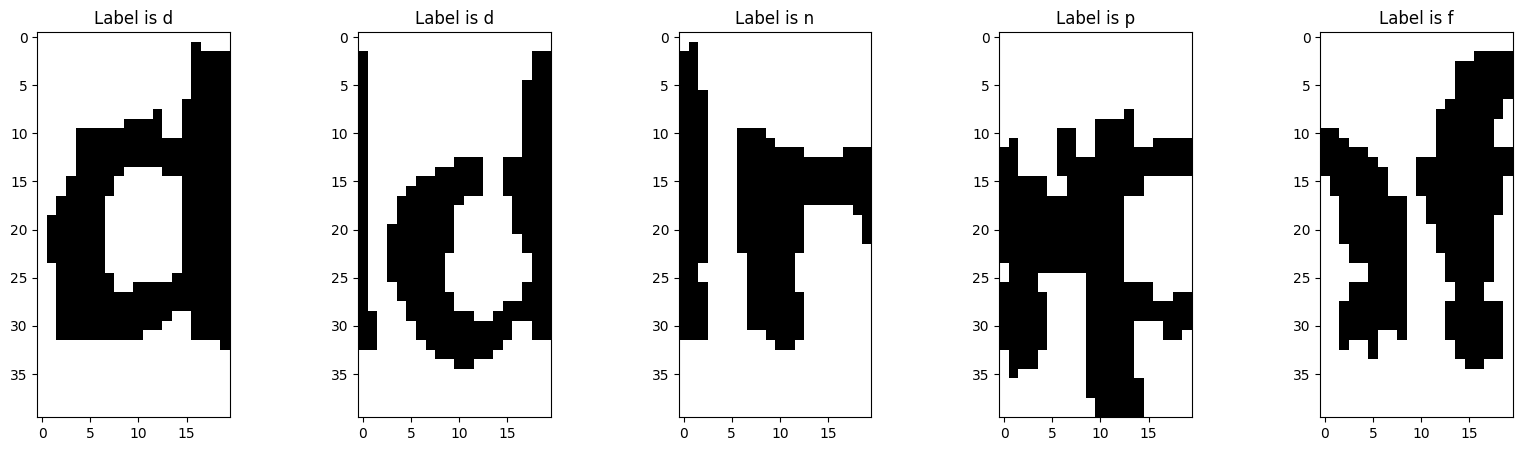

In [ ]:
plt.figure(figsize = (20,5))
for i in range(5) :
    plt.subplot(1,5,i+1)
    plt.imshow(X[i], 'gray')
    plt.title('Label is ' + str(y[i]))
plt.plot()

In [ ]:
temp = set(y)
for t in temp :
    print('Occurance count of ' + t + ' : ' + str(len(y[y == t])))

Occurance count of y : 232
Occurance count of g : 271
Occurance count of d : 259
Occurance count of 6 : 259
Occurance count of 2 : 265
Occurance count of x : 264
Occurance count of 3 : 267
Occurance count of p : 253
Occurance count of 7 : 258
Occurance count of f : 271
Occurance count of b : 240
Occurance count of n : 525
Occurance count of e : 235
Occurance count of c : 262
Occurance count of 4 : 284
Occurance count of w : 235
Occurance count of 5 : 281
Occurance count of m : 275
Occurance count of 8 : 264


In [ ]:
 temp_df = pandas.DataFrame({'labels' : [t for t in temp], 'Count' : [len(y[y==t]) for t in temp]})

<ipython-input-26-c477dcff4fad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')


Text(0.5, 1.0, 'Label distribution in CAPTCHAS')

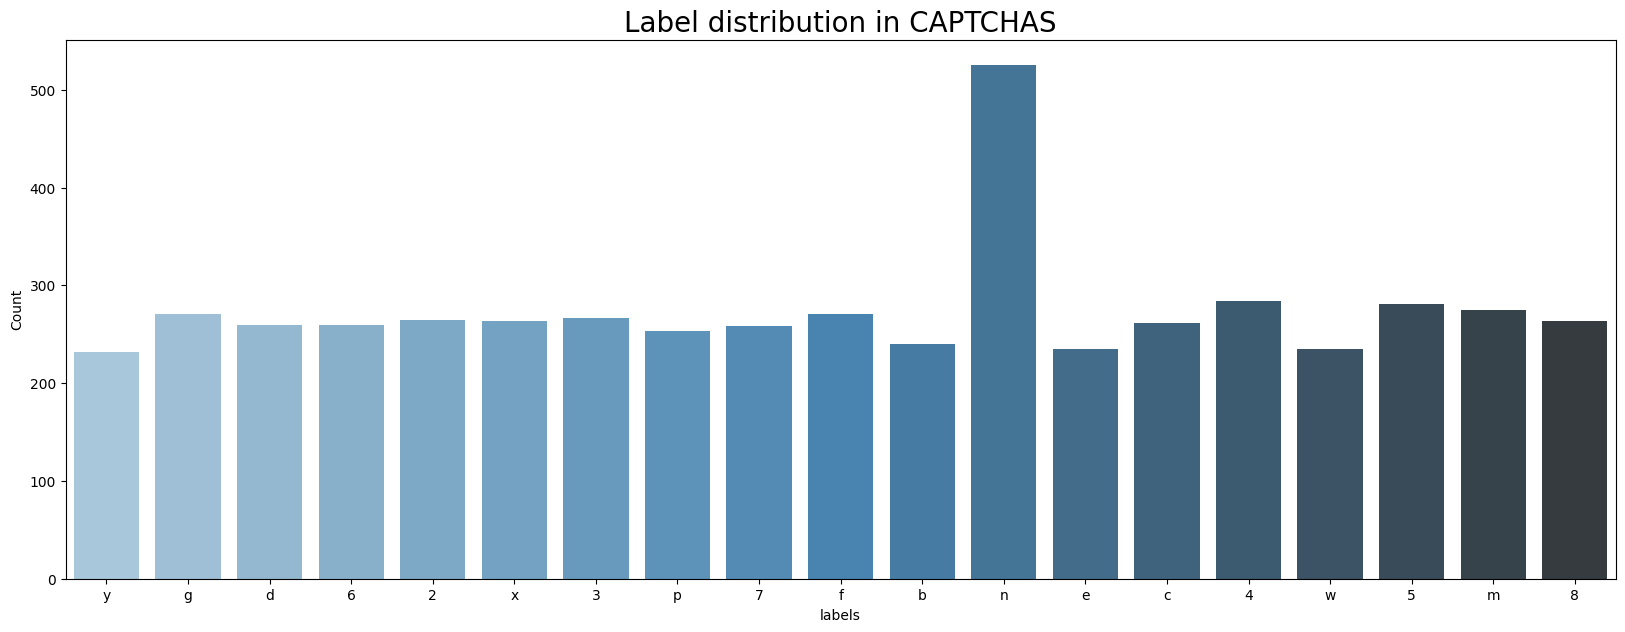

In [ ]:
plt.figure(figsize = (20,7))
seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')
plt.title('Label distribution in CAPTCHAS', fontsize = 20)

The count of label **n** is almost twice as any other label, so more samples of this letter will be put in the test set.

### One hot encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding
y_combine = LabelEncoder().fit_transform(y)

# One-Hot Encoding
y_one_hot = OneHotEncoder(sparse_output=False).fit_transform(y_combine.reshape(len(y_combine), 1))

In [ ]:
print('letter n : ' + str(y[1]))
print('label : ' + str(y_combine[1]))
print('Count : ' + str(len(y_combine[y_combine == y_combine[1]])))

letter n : d
label : 9
Count : 259


In [ ]:
info = {y_combine[i] : y[i] for i in range(len(y))}

# Train test split

In [ ]:
print(X.shape)
print(y_one_hot.shape)  # one hot encoded form

(5200, 40, 20, 1)
(5200, 19)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size = 0.2, random_state = 1)

In [ ]:
y_temp = np.argmax(y_test, axis = 1)

In [ ]:
temp = set(y_temp)
temp_df = pandas.DataFrame({'labels' : [info[t] for t in temp], 'Count' : [len(y_temp[y_temp == t]) for t in temp]})

<ipython-input-35-61f772194c12>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')


Text(0.5, 1.0, 'Label distribution in test set')

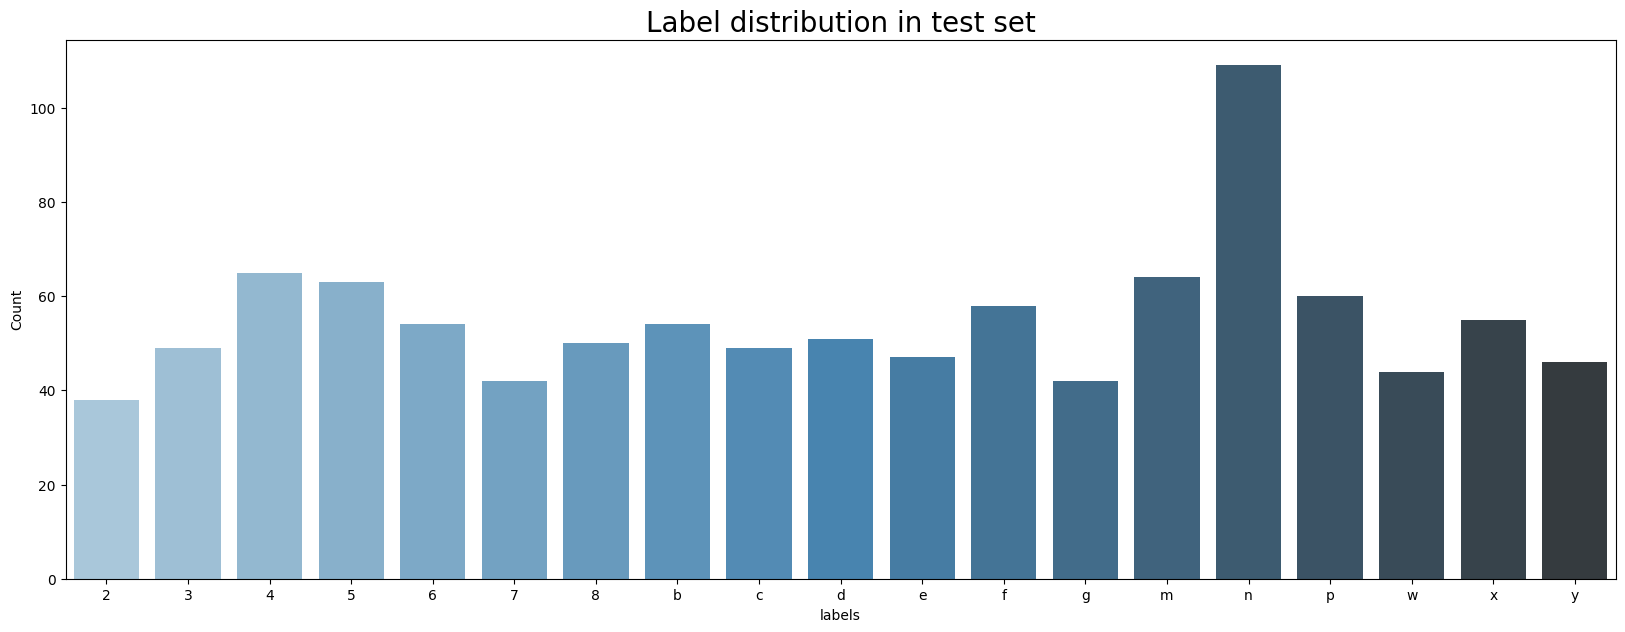

In [ ]:
plt.figure(figsize = (20,7))
seaborn.barplot(x = 'labels', y = 'Count', data = temp_df, palette = 'Blues_d')
plt.title('Label distribution in test set', fontsize = 20)

# Model Creation

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization

from keras.layers import Dropout
from keras.layers import Input

In [ ]:
print(X_train.shape)
print(y_train.shape)

(4160, 40, 20, 1)
(4160, 19)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(1040, 40, 20, 1)
(1040, 19)


In [ ]:
def conv_layer (filterx) :

    model = Sequential()

    model.add(Conv2D(filterx, (3,3), padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

    return model

In [ ]:
def dens_layer (hiddenx) :

    model = Sequential()

    model.add(Dense(hiddenx, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    return model

In [ ]:
def cnn (filter1, filter2, filter3, hidden1, hidden2) :

    model = Sequential()
    model.add(Input((40, 20, 1,)))

    model.add(conv_layer(filter1))
    model.add(conv_layer(filter2))
    model.add(conv_layer(filter3))

    model.add(Flatten())
    model.add(dens_layer(hidden1))
    model.add(dens_layer(hidden2))

    model.add(Dense(19, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    return model

# Data augmentation and Oversampling

### SMOTE

In [ ]:
X_train = np.reshape(X_train, (4160, 40*20*1))

In [ ]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE(sampling_strategy = 'auto', random_state = 1).fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
print(X_train.shape)
print(y_train.shape)

(7904, 800)
(7904, 19)


In [ ]:
print(X_train.shape)
print(X_train.size)

(7904, 800)
6323200


In [ ]:
X_train = np.reshape(X_train, (7904, 40, 20, 1))

Oversampled images

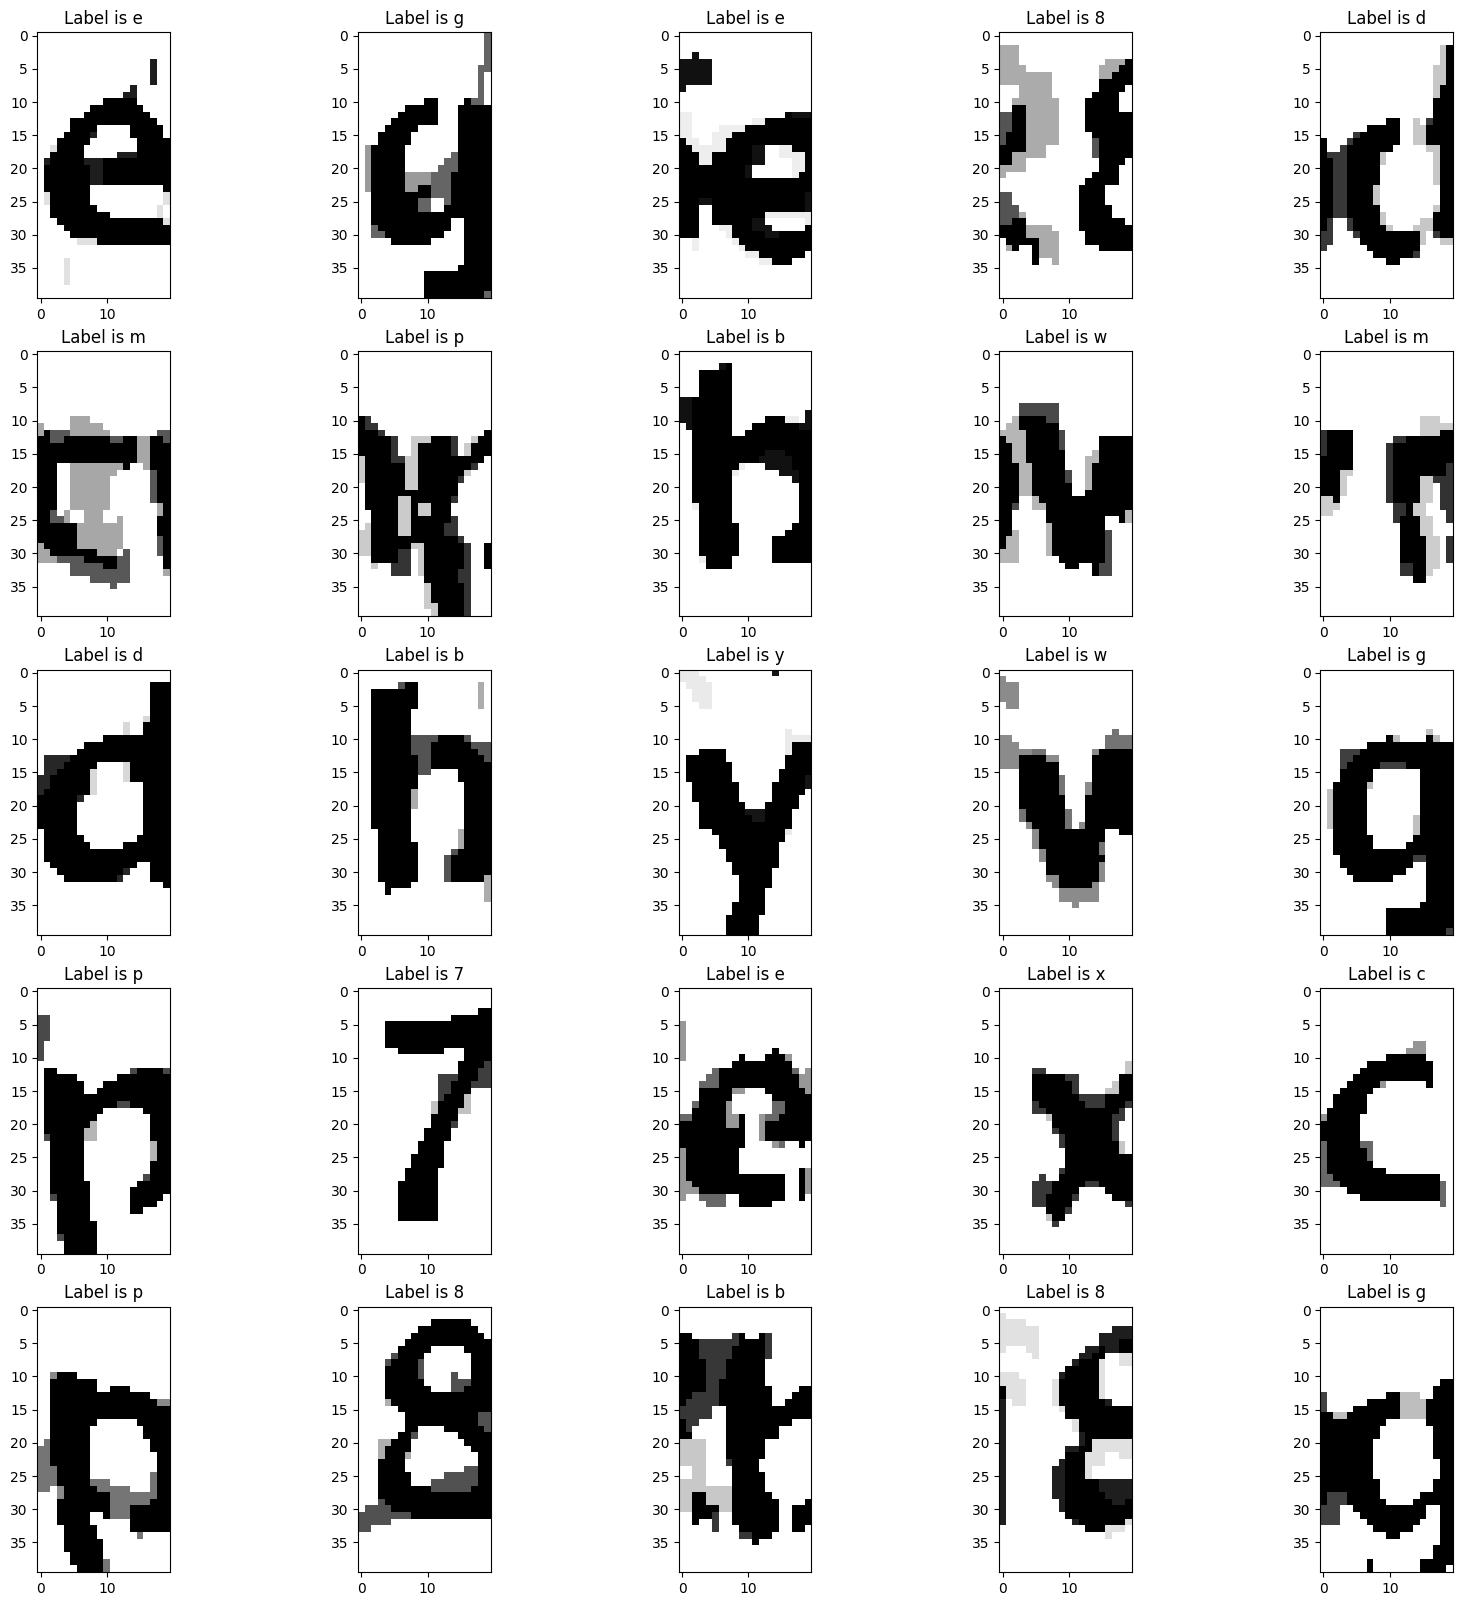

In [ ]:
plt.figure(figsize = (20,20))

hi = 7800
lo = 5000

for i in range(25) :
    plt.subplot(5,5,i+1)
    x = np.random.randint(lo, hi)
    plt.imshow(X_train[x], 'gray')
    plt.title('Label is ' + str(info[np.argmax(y_train[x])]))
plt.show()

### ImageDataGenerator

In [ ]:
traingen = ImageDataGenerator(rotation_range = 5, width_shift_range = [-2,2])
traingen.fit(X_train)

In [ ]:
train_set = traingen.flow(X_train, y_train)

In [ ]:
trainX, trainy = train_set.__next__()

Augmented images with rotations and shifts.

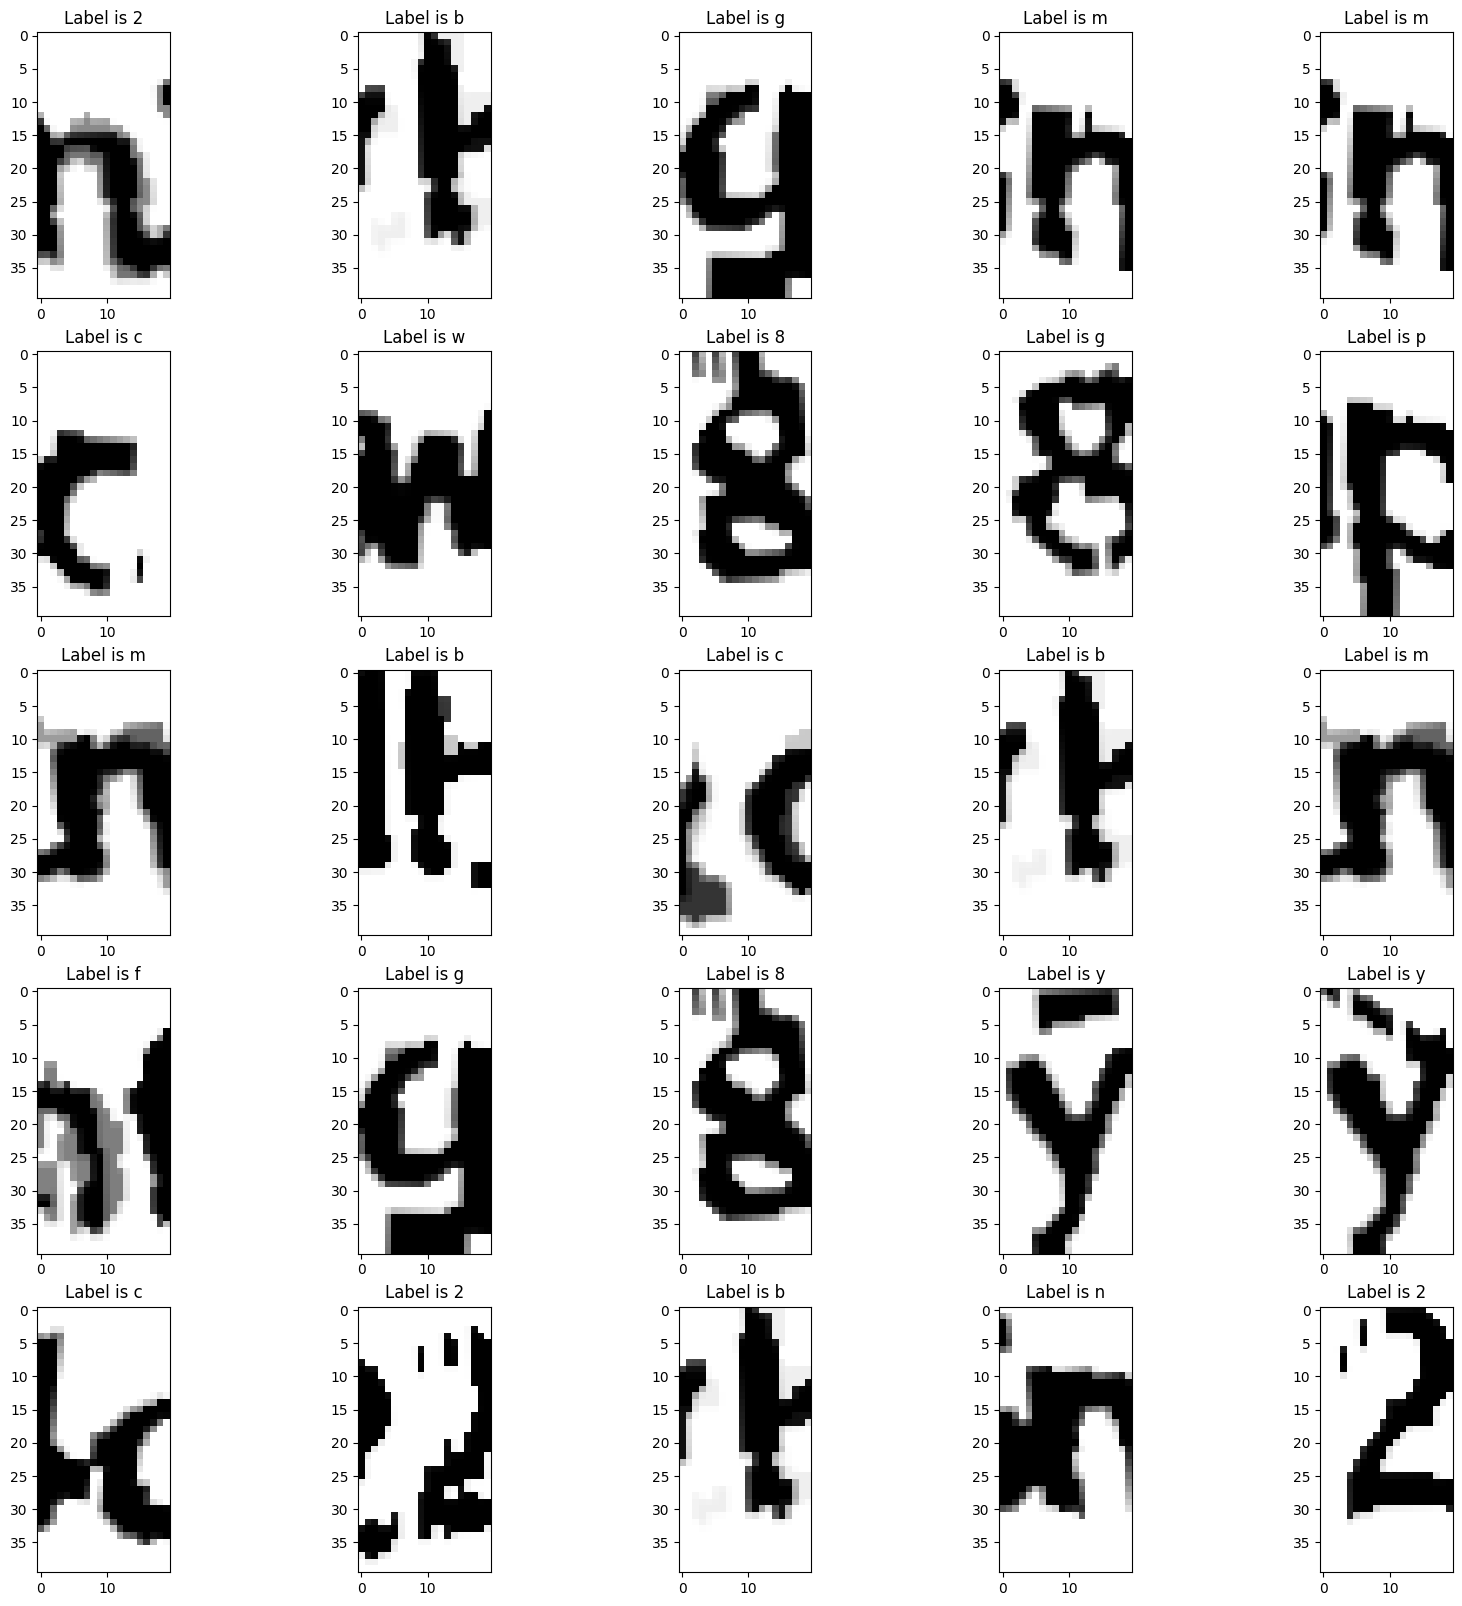

In [ ]:
plt.figure(figsize = (20,20))

hi = 32
lo = 0

for i in range(25) :
    plt.subplot(5,5,i+1)
    x = np.random.randint(lo, hi)
    plt.imshow(trainX[x], 'gray')
    plt.title('Label is ' + str(info[np.argmax(trainy[x])]))
plt.show()

# Model Training

In [ ]:
model = cnn(128, 32, 16, 32, 32)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 20, 10, 128)         │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 10, 5, 32)           │          37,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_3 (Sequential)            │ (None, 5, 3, 16)            │           4,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 240)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 32)                  │           7,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_5 (Sequential)            │ (None, 32)                  │           1,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 19)                  │             627 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,155 (207.64 KB)

 Trainable params: 52,675 (205.76 KB)

 Non-trainable params: 480 (1.88 KB)

### ModelCheckpoint and ReduceLROnPlateau
Used ModelCheckpoint to retain the best perfroming model (in terms of loss), and ReduceLROnPlateau to reduce the learning in case the model stops improving.

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkp = ModelCheckpoint('./result_model.keras', monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
reduce = ReduceLROnPlateau(monitor = 'val_loss', patience = 20, verbose = 1)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(7904, 40, 20, 1)
(7904, 19)


In [ ]:
steps_per_epoch = int(len(X_train) / 32)

In [ ]:
history = model.fit(
    traingen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    callbacks=[checkp])

Epoch 1/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.8057 - loss: 0.6791
Epoch 1: val_loss improved from 0.64171 to 0.62895, saving model to ./result_model.keras
247/247 ━━━━━━━━━━━━━━━━━━━━ 51s 206ms/step - accuracy: 0.8057 - loss: 0.6790 - val_accuracy: 0.8231 - val_loss: 0.6290
Epoch 2/50

Epoch 2: val_loss did not improve from 0.62895
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8231 - val_loss: 0.6290
Epoch 3/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.8145 - loss: 0.6380
Epoch 3: val_loss did not improve from 0.62895
247/247 ━━━━━━━━━━━━━━━━━━━━ 50s 200ms/step - accuracy: 0.8145 - loss: 0.6380 - val_accuracy: 0.8327 - val_loss: 0.6327
Epoch 4/50

Epoch 4: val_loss did not improve from 0.62895
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8327 - val_loss: 0.6327
Epoch 5/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.8339 - loss

Text(0.5, 1.0, 'Model accuracy wrt Epoch')

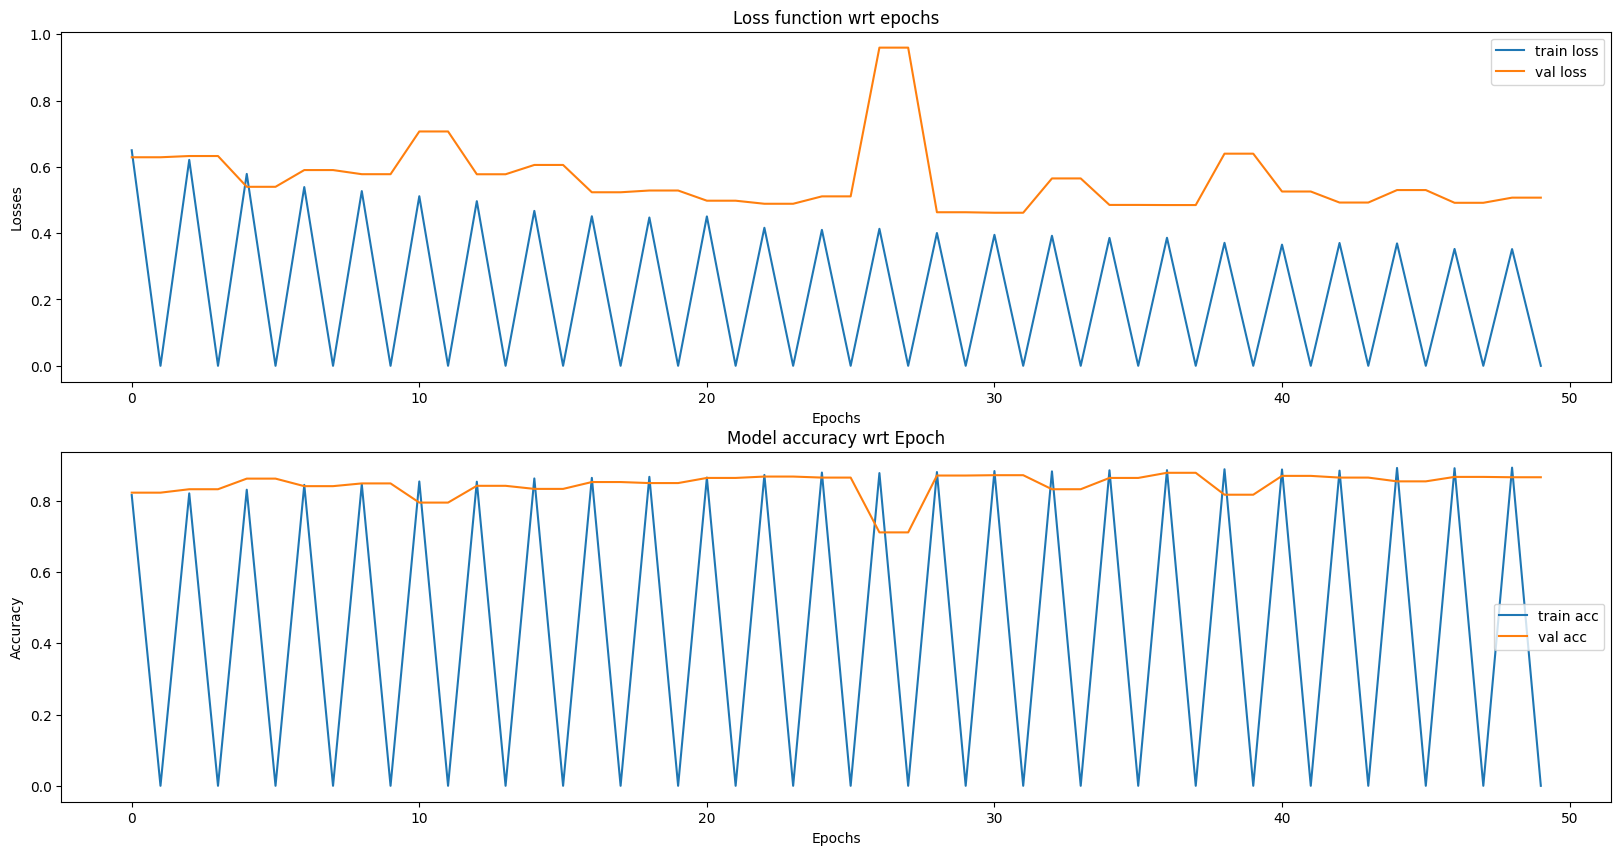

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['train loss','val loss'])
plt.title('Loss function wrt epochs')

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train acc' , 'val acc'])
plt.title('Model accuracy wrt Epoch')

# Prediction

In [ ]:
from keras.models import load_model

In [ ]:
model = load_model('./result_model.keras')

In [ ]:
pred = model.predict(X_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


Perfromed numpy argmax to obtain the value which has the highest probability of being the truth value.

In [ ]:
pred = np.argmax(pred, axis = 1)
yres = np.argmax(y_test,axis= 1)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
target_name = []
for i in sorted(info) :
    target_name.append(info[i])

In [ ]:
target_name

['2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'm',
 'n',
 'p',
 'w',
 'x',
 'y']

In [ ]:
print('Accuracy : ' + str(accuracy_score(yres, pred)))
print(classification_report(yres, pred, target_names = target_name))

Accuracy : 0.8721153846153846
              precision    recall  f1-score   support

           2       0.91      0.84      0.88        38
           3       1.00      0.82      0.90        49
           4       0.92      1.00      0.96        65
           5       0.95      0.87      0.91        63
           6       0.92      0.89      0.91        54
           7       0.97      0.90      0.94        42
           8       0.87      0.96      0.91        50
           b       0.94      0.91      0.92        54
           c       0.78      0.82      0.80        49
           d       0.85      0.92      0.89        51
           e       0.95      0.77      0.85        47
           f       0.86      0.95      0.90        58
           g       0.89      0.98      0.93        42
           m       0.91      0.33      0.48        64
           n       0.70      0.92      0.79       109
           p       0.89      0.98      0.94        60
           w       0.70      0.95      0.81        

# Testing on samples

In [ ]:
def get_demo (img_path) :

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()

    img = t_img(img)
    img = c_img(img)
    img = d_img(img)
    img = b_img(img)

    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]

    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    Xdemo = []
    for i in range(5) :
        Xdemo.append(img_to_array(Image.fromarray(image_list[i])))

    Xdemo = np.array(Xdemo)
    Xdemo/= 255.0

    ydemo = model.predict(Xdemo)
    ydemo = np.argmax(ydemo, axis = 1)

    for res in ydemo :
        print(info[res])
    print(img_path[-9:])

#### Samples for which model identified correctly.

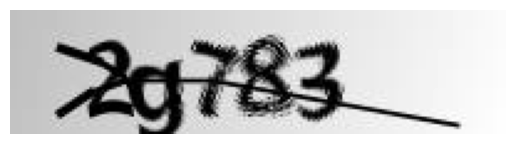

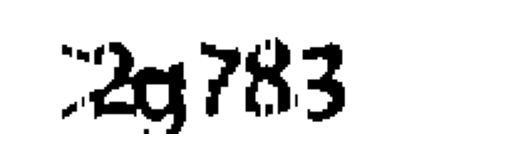

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2
g
7
8
3
2g783.png


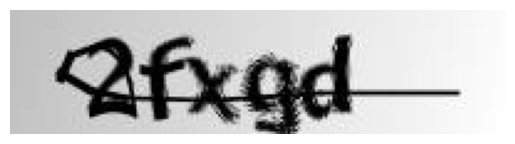

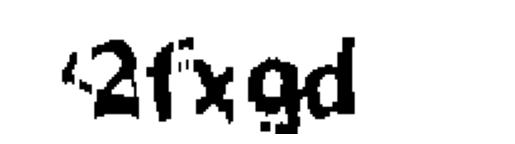

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2
f
x
g
d
2fxgd.png


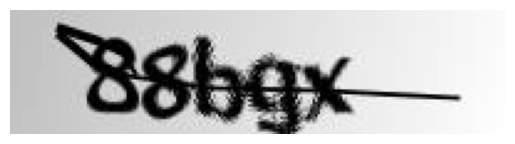

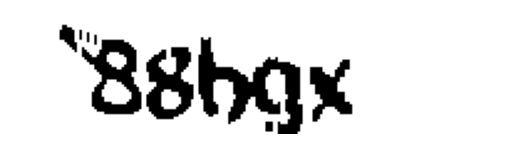

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
8
8
b
g
x
88bgx.png


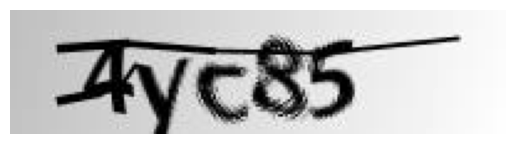

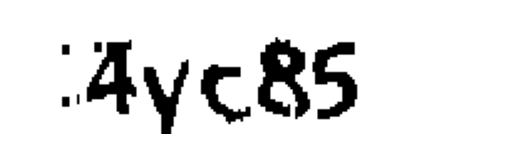

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
4
y
c
8
5
4yc85.png


In [ ]:
get_demo('/root/.cache/kagglehub/datasets/fournierp/captcha-version-2-images/versions/2/samples/2g783.png')
get_demo('/root/.cache/kagglehub/datasets/fournierp/captcha-version-2-images/versions/2/samples/2fxgd.png')
get_demo('/root/.cache/kagglehub/datasets/fournierp/captcha-version-2-images/versions/2/samples/88bgx.png')
get_demo('/root/.cache/kagglehub/datasets/fournierp/captcha-version-2-images/versions/2/samples/4yc85.png')

#### Samples where model made errors while identification.

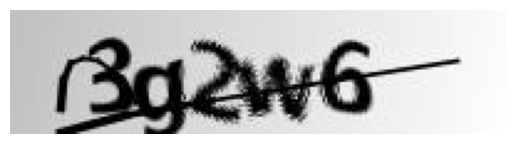

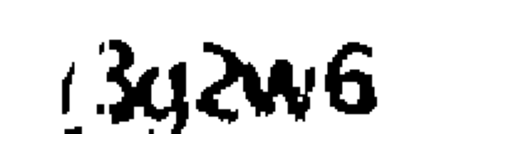

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
3
g
2
w
n
3g2w6.png


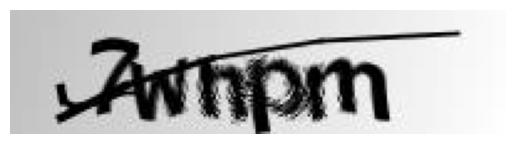

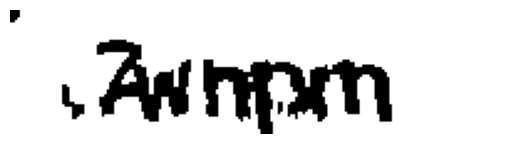

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
7
w
n
p
n
7wnpm.png


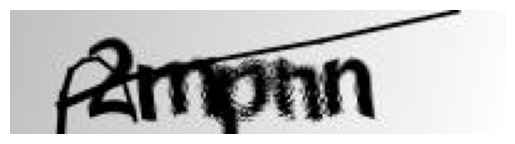

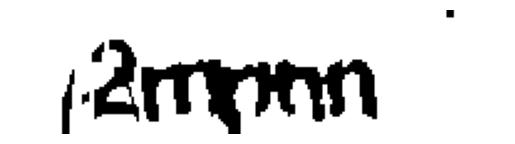

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
2
n
p
p
m
2mpnn.png


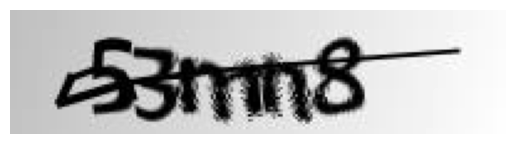

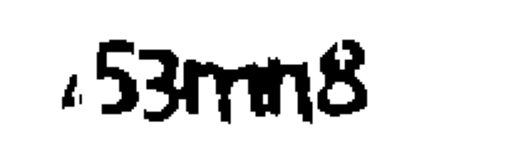

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
5
3
n
m
8
53mn8.png


In [ ]:
get_demo('/root/.cache/kagglehub/datasets/fournierp/captcha-version-2-images/versions/2/samples/3g2w6.png')
get_demo('/root/.cache/kagglehub/datasets/fournierp/captcha-version-2-images/versions/2/samples/7wnpm.png')
get_demo('/root/.cache/kagglehub/datasets/fournierp/captcha-version-2-images/versions/2/samples/2mpnn.png')
get_demo('/root/.cache/kagglehub/datasets/fournierp/captcha-version-2-images/versions/2/samples/53mn8.png')